# Quick Overview:
This notebook is split into two sections
 - The first contains all of the finalised code mentioned in the report. 
 - The second contains many of the model variants tried - primarily the NN's. This was done to provide evidence of previous attempts. 

In [56]:
# Data processing 
import numpy as np 
import pandas as pd 
from collections import Counter
import joblib
import pickle

# Data Viz
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

# ML packages
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras

import tensorflow_addons as tfa

# Metrics
from sklearn import metrics
from sklearn.metrics import recall_score, precision_score, \
                            average_precision_score, f1_score, \
                            precision_recall_curve, precision_recall_curve, \
                            auc
from sklearn.metrics import make_scorer
from scipy.stats import expon, reciprocal





# Resampling Techniques
from imblearn.over_sampling import SMOTE 
from imblearn.under_sampling import EditedNearestNeighbours
from imblearn.under_sampling import RepeatedEditedNearestNeighbours
from imblearn.under_sampling import RandomUnderSampler


##### Loading Data

In [2]:
data = pd.read_csv('data/creditcard.csv')
data


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


###### Missing Values and Summary Statistics

In [3]:
data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [4]:
data.describe().transpose().applymap('{:,.2f}'.format)

,count,mean,std,min,25%,50%,75%,max
Time,"284,807.00","94,813.86","47,488.15",0.00,"54,201.50","84,692.00","139,320.50","172,792.00"
V1,"284,807.00",0.00,1.96,-56.41,-0.92,0.02,1.32,2.45
V2,"284,807.00",0.00,1.65,-72.72,-0.60,0.07,0.80,22.06
V3,"284,807.00",-0.00,1.52,-48.33,-0.89,0.18,1.03,9.38
V4,"284,807.00",0.00,1.42,-5.68,-0.85,-0.02,0.74,16.88
V5,"284,807.00",0.00,1.38,-113.74,-0.69,-0.05,0.61,34.80
V6,"284,807.00",0.00,1.33,-26.16,-0.77,-0.27,0.40,73.30
V7,"284,807.00",-0.00,1.24,-43.56,-0.55,0.04,0.57,120.59
V8,"284,807.00",0.00,1.19,-73.22,-0.21,0.02,0.33,20.01
V9,"284,807.00",-0.00,1.10,-13.43,-0.64,-0.05,0.60,15.59


###### Breakdown of Fraudulent to non-Fraudulent transactions:

Number of Fraudulent Transactions:  0.173%
Number of Non-Fraudulent Transactions:  99.827%


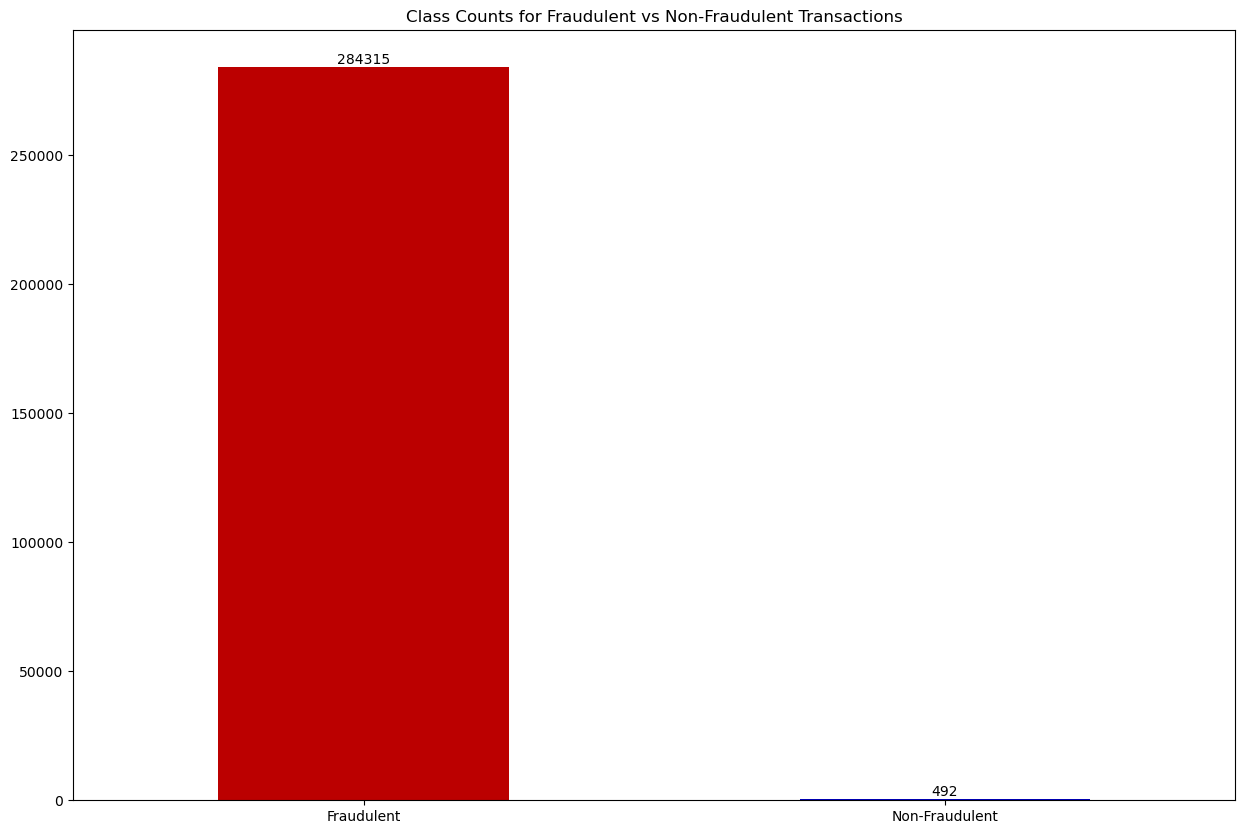

In [12]:
classes_dict = {
    0: 'Fraudulent',
    1: 'Non-Fraudulent'
}

classes = data['Class'].map(classes_dict).value_counts()

print(f'Number of Fraudulent Transactions: {(classes[1]/classes.sum())*100: .3f}%')
print(f'Number of Non-Fraudulent Transactions: {(classes[0]/classes.sum())*100: .3f}%')

ax = classes.plot(kind='bar', color = ['#BB0000', '#0000BB'], 
                  rot = 0, figsize=(15,10),
                  title= 'Class Counts for Fraudulent vs Non-Fraudulent Transactions')
ax.bar_label(ax.containers[0])
plt.show()

Dataset presents a severe imbalance between the classes which will need to be sorted out before running any models

### Splitting the data into Training and Testing

In [5]:
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(data, data["Class"]):
    strat_train_set = data.loc[train_index]
    strat_test_set = data.loc[test_index]

In [6]:
print('Split data')
print(strat_train_set["Class"].value_counts() / len(strat_train_set))
print('\nOriginal Data')
print(data["Class"].value_counts() / len(data))

Split data
0    0.998271
1    0.001729
Name: Class, dtype: float64

Original Data
0    0.998273
1    0.001727
Name: Class, dtype: float64


In [63]:
# testing data
X_test = strat_test_set.drop("Class", axis=1) 
y_test = strat_test_set["Class"].copy()

### Data Exploration and Visualisation

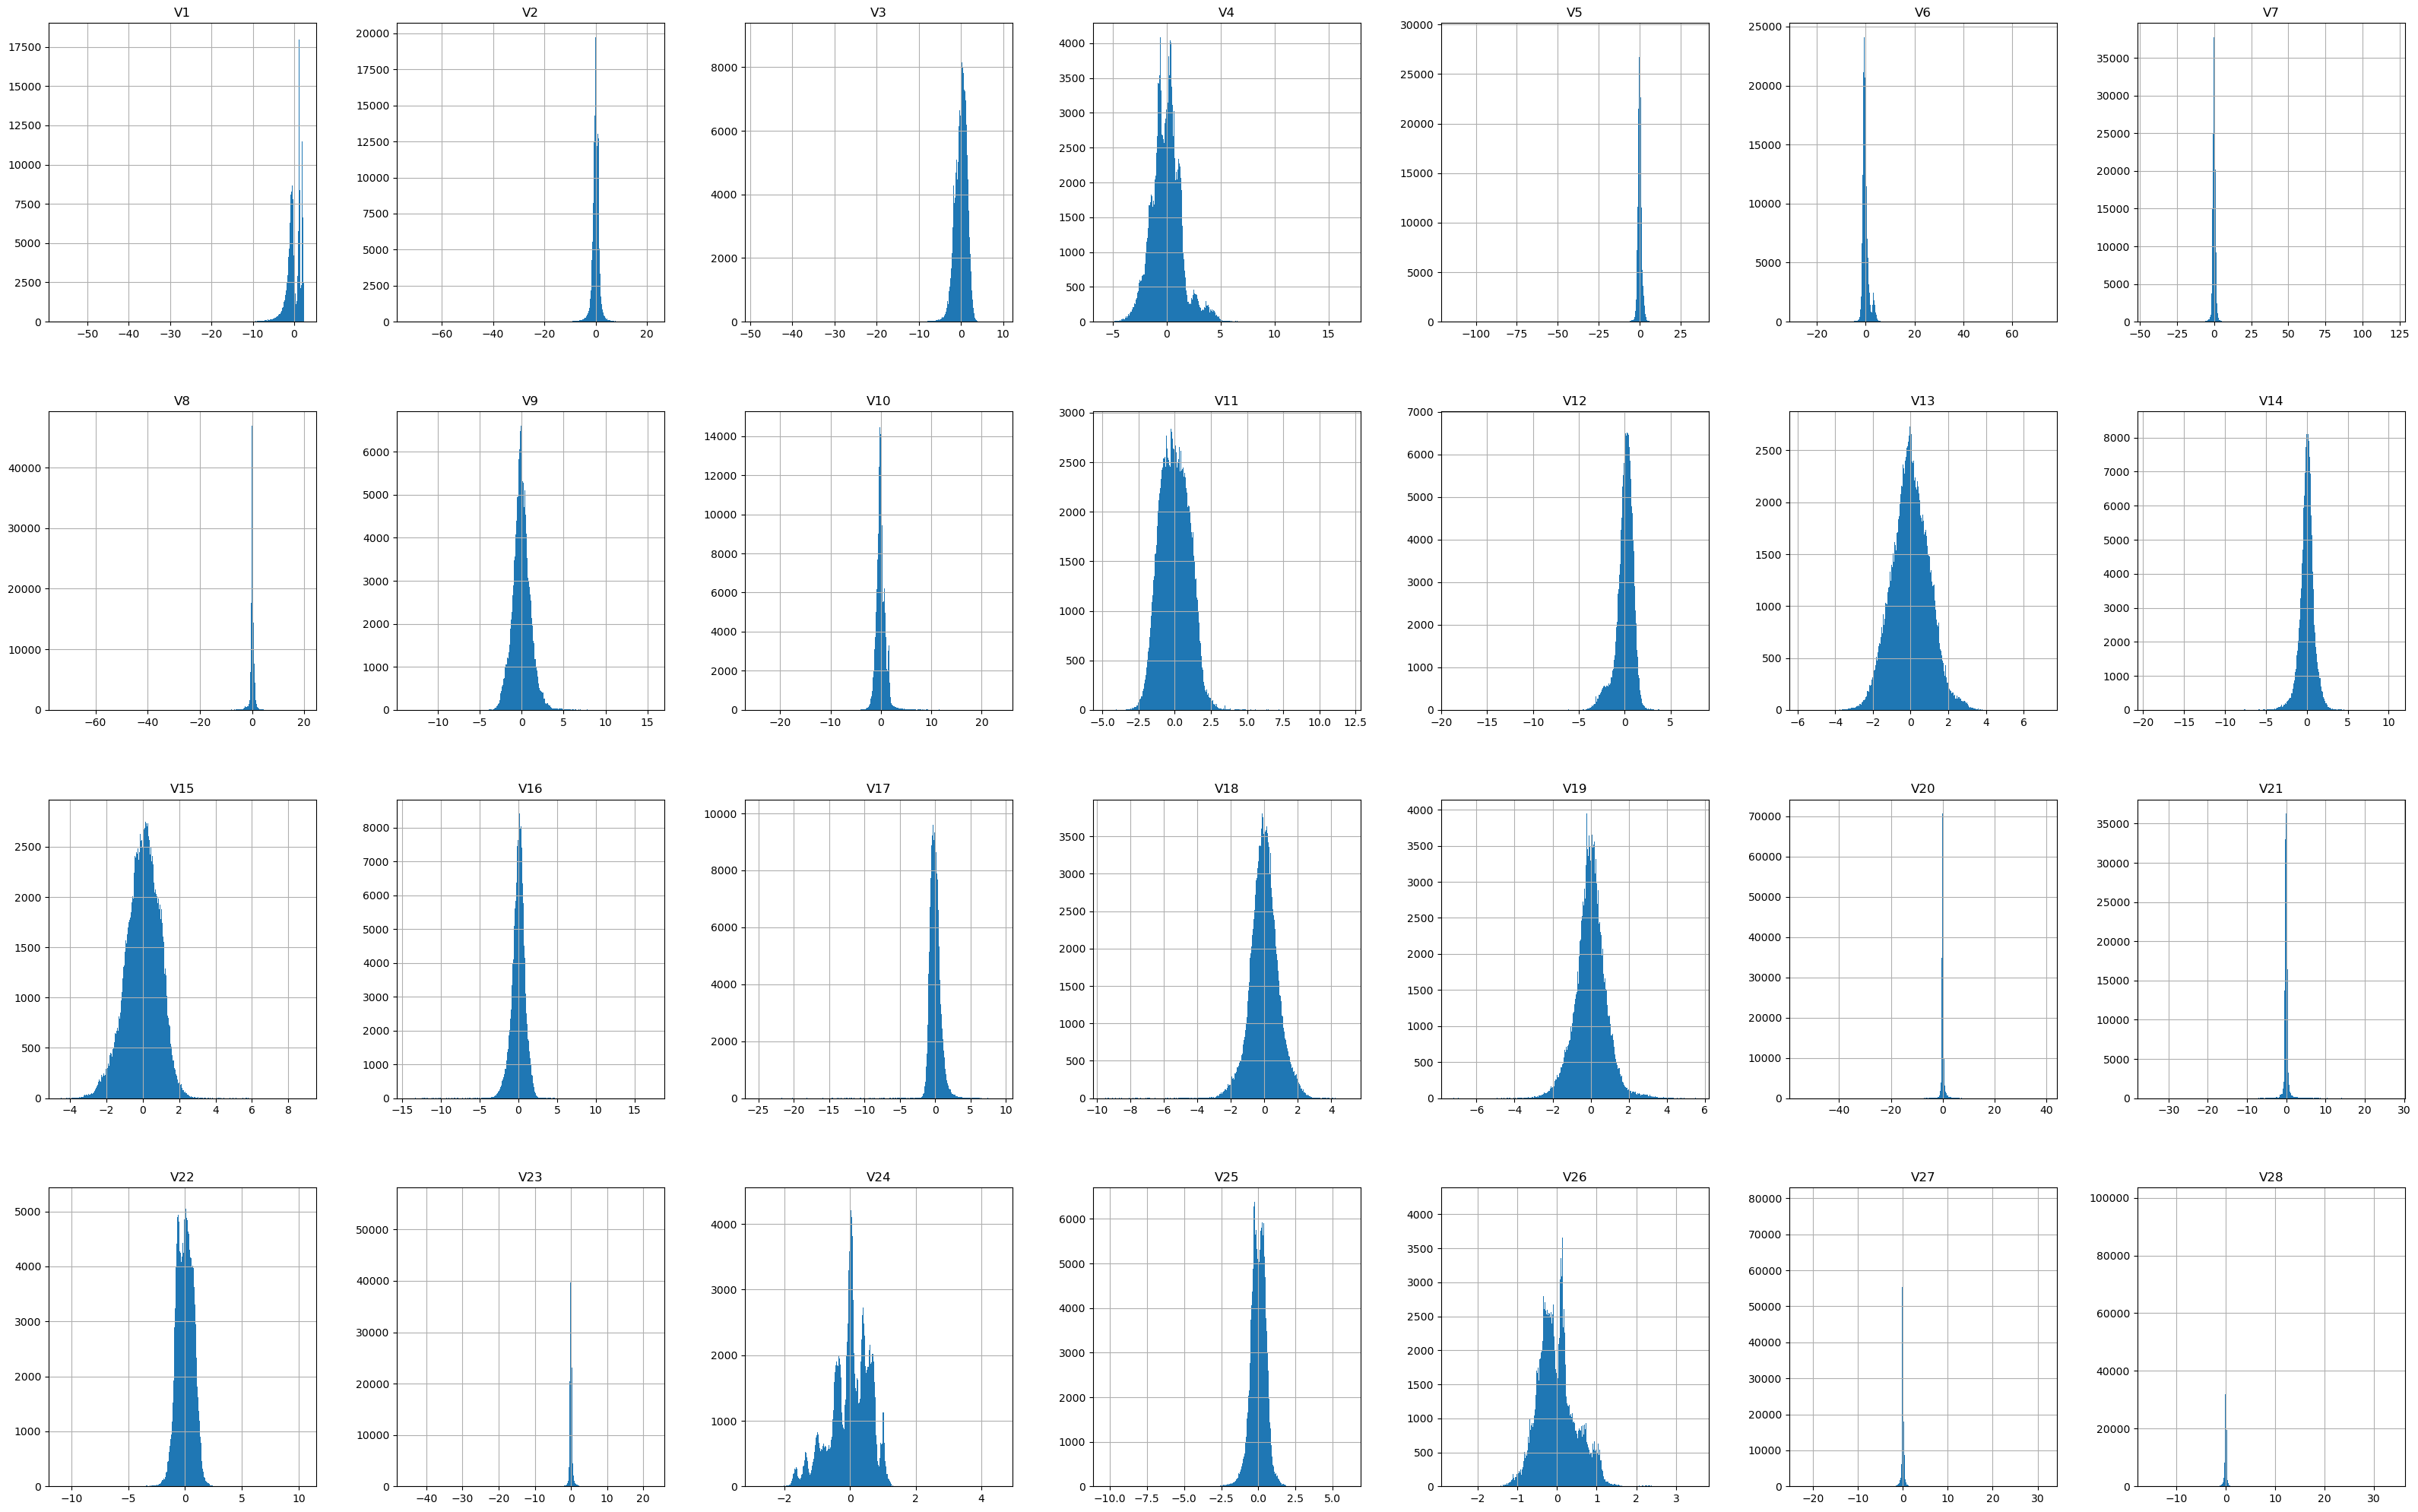

In [71]:
%matplotlib inline
strat_train_set.drop(['Class', 'Amount', 'Time'], axis=1).hist(figsize=(40,25), bins=500, layout=(4,7))
plt.savefig('PCA Variables Histogram.png')

plt.show()

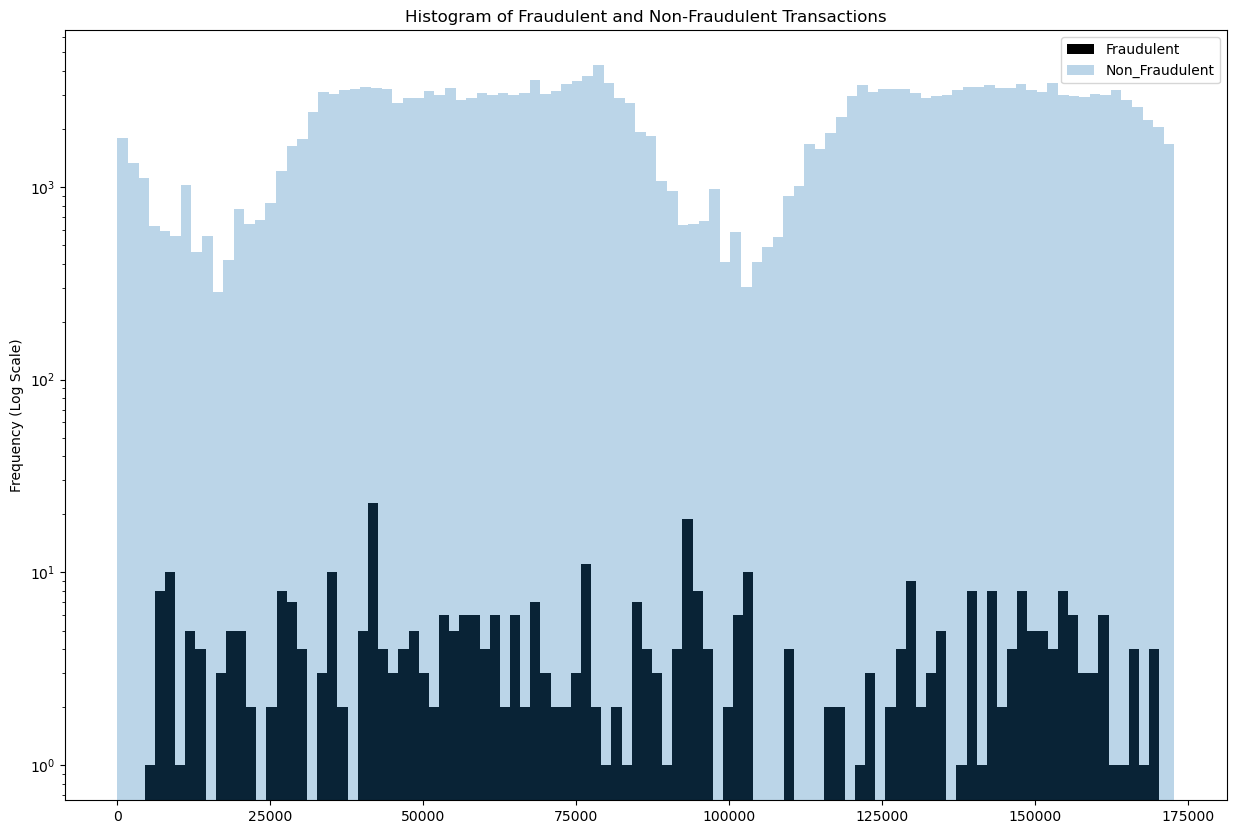

In [53]:
frauds=strat_train_set[strat_train_set['Class']==1]
nonfrauds=strat_train_set[strat_train_set['Class']==0]

plt.figure(figsize=(15,10))
frauds['Time'].plot.hist(bins=100, label='Fraudulent', color='black')
nonfrauds['Time'].plot.hist(bins=100, alpha=0.3, label = 'Non_Fraudulent')
plt.yscale('log')
plt.title('Histogram of Fraudulent and Non-Fraudulent Transactions')
plt.ylabel('Frequency (Log Scale)')
plt.legend()
plt.show()

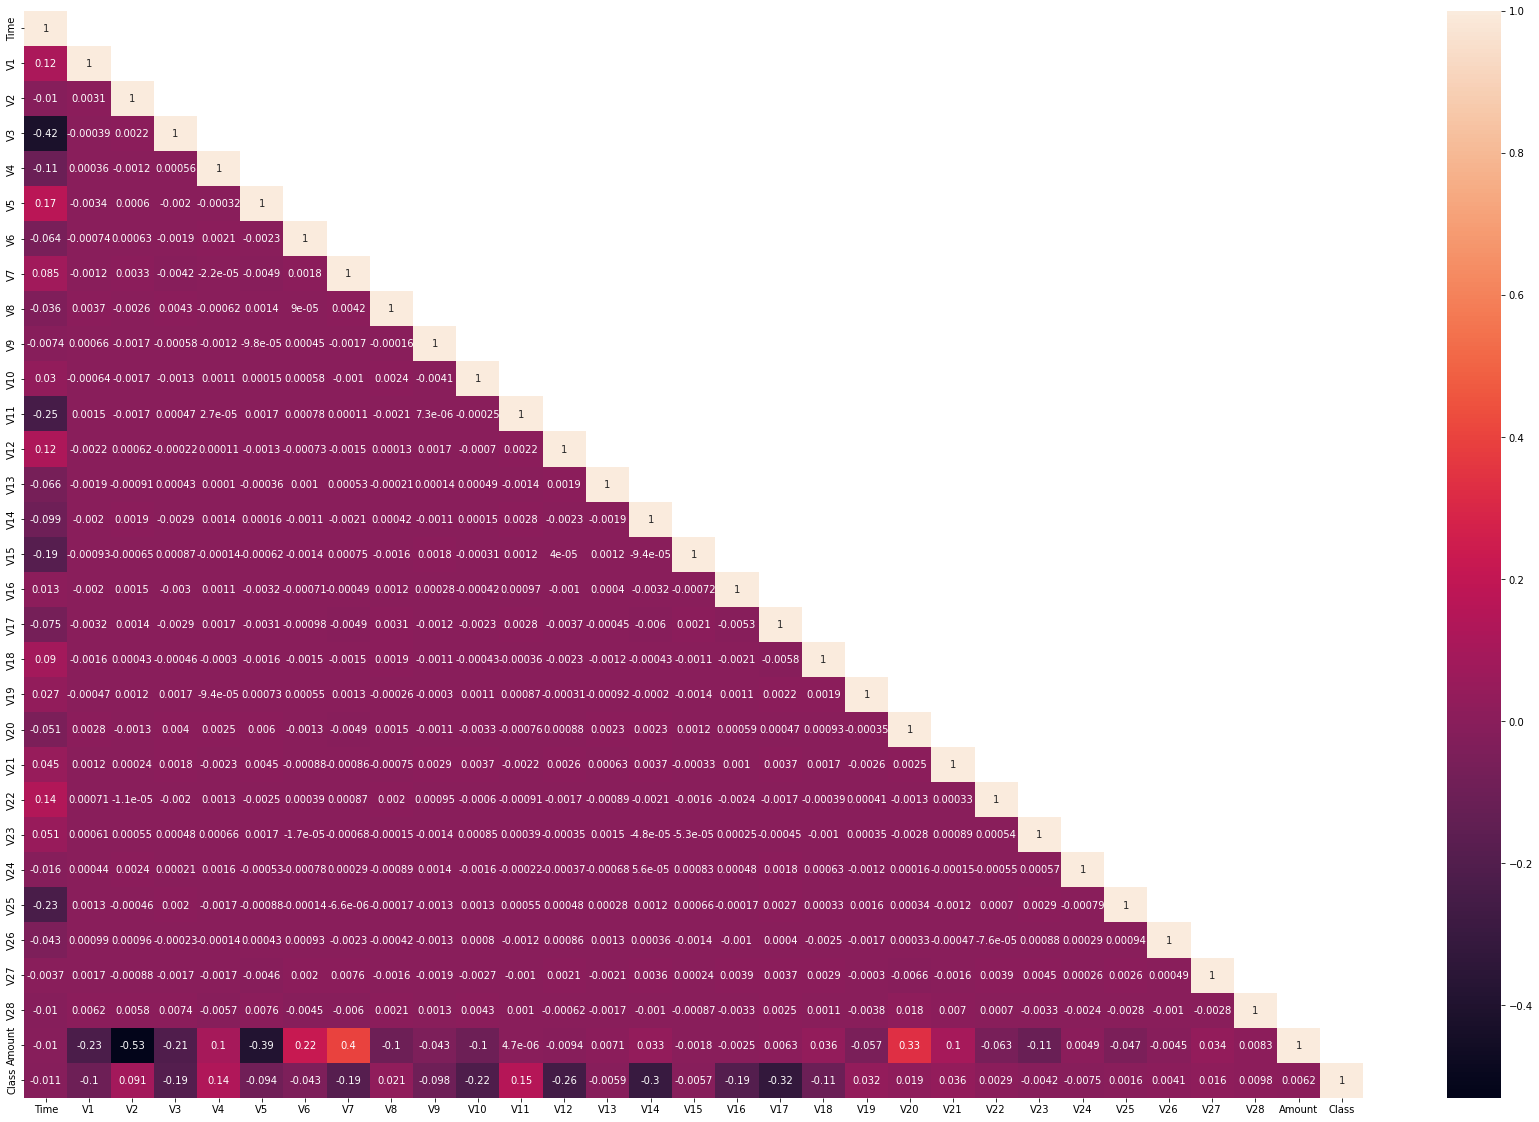

In [7]:
plt.figure(figsize = (30,20))
corr=strat_train_set.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
mask[np.diag_indices_from(mask)] = False
sns.heatmap(corr,annot=True, mask=mask)
plt.show()

##### Checking for Outliers

In [8]:
def find_outliers_IQR(df, outlier_bound):
    q1=df.quantile(0.25)   
    q3=df.quantile(0.75)
    IQR=q3-q1
    outliers = df[((df<(q1-outlier_bound*IQR)) | (df>(q3+outlier_bound*IQR)))]
    return outliers

outlier_df=strat_train_set.copy()
outlier_df.loc[:, ~outlier_df.columns.isin(['Time', 'Class'])] = find_outliers_IQR(outlier_df.loc[:, ~outlier_df.columns.isin(['Time', 'Class'])], 1.5)
outlier_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 227845 entries, 265518 to 17677
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    227845 non-null  float64
 1   V1      5639 non-null    float64
 2   V2      10774 non-null   float64
 3   V3      2689 non-null    float64
 4   V4      8958 non-null    float64
 5   V5      9805 non-null    float64
 6   V6      18273 non-null   float64
 7   V7      7112 non-null    float64
 8   V8      19214 non-null   float64
 9   V9      6649 non-null    float64
 10  V10     7558 non-null    float64
 11  V11     611 non-null     float64
 12  V12     12256 non-null   float64
 13  V13     2663 non-null    float64
 14  V14     11321 non-null   float64
 15  V15     2301 non-null    float64
 16  V16     6508 non-null    float64
 17  V17     5864 non-null    float64
 18  V18     6084 non-null    float64
 19  V19     8159 non-null    float64
 20  V20     22281 non-null   float64
 21  V21   

#### Training Models

#### Dealing with Class Imbalance

I will use two different approaches to the class imbalance problem:
1. Resampling Techniques
    - Oversampling - using techniques such as SMOTE
    - Undersampling - most likely using random undersampling though i will look at Edited Nearest Neighbours. Drawbacks to both
2. Cost Sensitive Learning 


Models being used are: 
- SVM
- Random Forest

SVM will require scaling, whereas RF wont. 
the sampling techniques though will be done for both. 

In [9]:
def processing_SMOTE(X, y):
     # SMOTE
    sm = SMOTE(random_state=42)

    X_sm, y_sm = sm.fit_resample(X, y)
    
    print(f'''Shape of X before SMOTE: {X.shape} \nShape of X after SMOTE: {X_sm.shape}''')

    print(f'\nBalance of positive and negative classes (%): \n{y_sm.value_counts(normalize=True) * 100}\n')
    
    
    # pd.concat([pd.DataFrame(y_sm),X_sm], axis=1)
    
    return X_sm, y_sm

In [10]:
# Split the Training Data
transactions = strat_train_set.drop("Class", axis=1) # drop labels for training set
transactions_labels = strat_train_set["Class"].copy()
# Apply Random Under Sampler
print(f'Original dataset shape { Counter(transactions_labels)}')
rus = RandomUnderSampler(sampling_strategy={0:10000}, random_state=42)
X_rus, y_rus = rus.fit_resample(transactions, transactions_labels)
print(f'Original dataset shape { Counter(y_rus)}')
# Apply SMOTE oversampling
X_sm, y_sm = processing_SMOTE(X_rus, y_rus)

Original dataset shape Counter({0: 227451, 1: 394})
Original dataset shape Counter({0: 10000, 1: 394})
Shape of X before SMOTE: (10394, 30) 
Shape of X after SMOTE: (20000, 30)

Balance of positive and negative classes (%): 
0    50.0
1    50.0
Name: Class, dtype: float64



I've also included the attempt at using the Edited Nearest neighbours which didn't work as much as desired. 

In [8]:
# print(f'Original dataset shape { Counter(transactions_labels)}')
# enn = EditedNearestNeighbours(sampling_strategy='majority', n_jobs=-1)
# X_enn, y_enn = enn.fit_resample(transactions, transactions_labels)
# print(f'Original dataset shape { Counter(y_enn)}')

Original dataset shape Counter({0: 227451, 1: 394})
Original dataset shape Counter({0: 227084, 1: 394})


In [11]:
# print(f'Original dataset shape { Counter(transactions_labels)}')
# renn = RepeatedEditedNearestNeighbours(sampling_strategy='majority', max_iter=300, n_jobs=-1)
# X_renn, y_renn = renn.fit_resample(transactions, transactions_labels)
# print(f'Original dataset shape { Counter(y_renn)}')

Original dataset shape Counter({0: 227451, 1: 394})
Original dataset shape Counter({0: 226916, 1: 394})


##### SVM model

In [91]:
svm_clf = Pipeline([
    ('std_scaler', StandardScaler()),
    ("svc", SVC())
])

# cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=42)

params = {
    'svc__C': reciprocal(20, 200000), #[0.1, 1, 10, 100, 1000],
    'svc__gamma': expon(scale=1.0), #[1, 0.1, 0.01, 0.001, 0.0001],
    'svc__kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
    'svc__degree': range(1,11)
}

# scoring = ['precision', 'recall', 'average_precision', 'f1']
scoring = {"recall": make_scorer(recall_score, average='weighted'), 
           "precision": make_scorer(precision_score, average='weighted'),
           "average_precision": make_scorer(average_precision_score),
           "f1": make_scorer(f1_score)
          }

svm_rsg = RandomizedSearchCV(svm_clf, param_distributions = params, 
                             n_iter=50, cv=5, scoring=scoring, 
                             refit='average_precision', verbose=2,
                             n_jobs=-1, random_state=42)

%time svm_rsg_result = svm_rsg.fit(X_sm, y_sm)
# summarize result
print(f'Best Score: {svm_rsg_result.best_score_}')
print(f'Best Hyperparameters: {svm_rsg_result.best_params_}')


Fitting 5 folds for each of 50 candidates, totalling 250 fits
CPU times: total: 13 s
Wall time: 9min 35s
Best Score: 0.9945827816351273
Best Hyperparameters: {'svc__kernel': 'rbf', 'svc__gamma': 0.1, 'svc__degree': 2, 'svc__C': 100}


In [92]:
print('Model score:', svm_rsg_result.score(X_test, y_test))
joblib.dump(svm_rsg_result, 'models/svm_rsg_model.sav')

Model score: 0.15439982752785839


['models/svm_rsg_model.sav']

Confusion Matrix



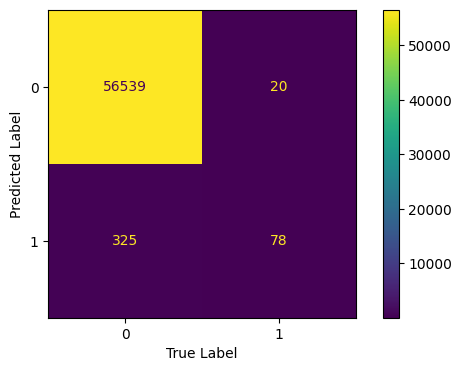



Classification Report:

              precision    recall  f1-score   support

           0       1.00      0.99      1.00     56864
           1       0.19      0.80      0.31        98

    accuracy                           0.99     56962
   macro avg       0.60      0.90      0.65     56962
weighted avg       1.00      0.99      1.00     56962



In [93]:
y_pred_svm = svm_rsg_result.predict(X_test)

print('Confusion Matrix\n')
# print(metrics.confusion_matrix(y_test, y_pred))

fig, ax = plt.subplots(1,1,figsize=(7,4))

ConfusionMatrixDisplay(confusion_matrix(y_pred_svm, y_test, labels=[0,1]),
                       display_labels=[0,1]).plot(values_format=".0f",ax=ax)

ax.set_xlabel("True Label")
ax.set_ylabel("Predicted Label")
plt.show()

print('\n\nClassification Report:\n')
print(metrics.classification_report(y_test, y_pred_svm, digits=2))

##### Random Forest

In [18]:
param_distribs = {
    'n_estimators': [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)],
    'max_features': [int(x) for x in np.linspace(start = 2, stop = 33, num = 16)], #[2,4,6,8,10,12],
    'bootstrap': [True, False]
    }

rf_clf = RandomForestClassifier()
scoring = {"precision": make_scorer(precision_score, average='weighted'), 
           'average_precision': make_scorer(average_precision_score)
          }

rnd_forest_RS = RandomizedSearchCV(rf_clf, param_distributions=param_distribs, refit="average_precision",
                                   n_iter=50, cv=5, scoring=scoring, verbose=2, random_state=42, 
                                   n_jobs=-1)
%time rnd_forest_RS.fit(X_sm, y_sm)

print('Model score:', rnd_forest_RS.score(X_test, y_test))
joblib.dump(rnd_forest_RS, 'models/rnd_forest_RS.sav')

Model score: 0.43902659913756914


Confusion Matrix



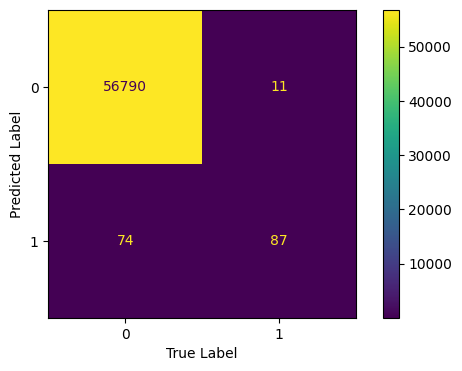



Classification Report:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.54      0.89      0.67        98

    accuracy                           1.00     56962
   macro avg       0.77      0.94      0.84     56962
weighted avg       1.00      1.00      1.00     56962



In [90]:
y_pred_rf = rnd_forest_RS.predict(X_test)

print('Confusion Matrix\n')
# print(metrics.confusion_matrix(y_test, y_pred))

fig, ax = plt.subplots(1,1,figsize=(7,4))

ConfusionMatrixDisplay(confusion_matrix(y_pred_rf, y_test, labels=[0,1]),
                       display_labels=[0,1]).plot(values_format=".0f",ax=ax)

ax.set_xlabel("True Label")
ax.set_ylabel("Predicted Label")
plt.show()

print('\n\nClassification Report:\n')
print(metrics.classification_report(y_test, y_pred_rf, digits=2))

### ANN

This model was trained on the full dataset with SMOTE applied

In [20]:
strat_train_set

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
265518,161919.0,1.946747,-0.752526,-1.355130,-0.661630,1.502822,4.024933,-1.479661,1.139880,1.406819,...,0.076197,0.297537,0.307915,0.690980,-0.350316,-0.388907,0.077641,-0.032248,7.32,0
180305,124477.0,2.035149,-0.048880,-3.058693,0.247945,2.943487,3.298697,-0.002192,0.674782,0.045826,...,0.038628,0.228197,0.035542,0.707090,0.512885,-0.471198,0.002520,-0.069002,2.99,0
42664,41191.0,-0.991920,0.603193,0.711976,-0.992425,-0.825838,1.956261,-2.212603,-5.037523,0.000772,...,-2.798352,0.109526,-0.436530,-0.932803,0.826684,0.913773,0.038049,0.185340,175.10,0
198723,132624.0,2.285718,-1.500239,-0.747565,-1.668119,-1.394143,-0.350339,-1.427984,0.010010,-1.118447,...,-0.139670,0.077013,0.208310,-0.538236,-0.278032,-0.162068,0.018045,-0.063005,6.10,0
82325,59359.0,-0.448747,-1.011440,0.115903,-3.454854,0.715771,-0.147490,0.504347,-0.113817,-0.044782,...,-0.243245,-0.173298,-0.006692,-1.362383,-0.292234,-0.144622,-0.032580,-0.064194,86.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
233802,147710.0,1.993864,-0.516866,-0.620118,0.129845,-0.285128,0.395044,-0.822358,0.231591,0.995898,...,0.262526,0.884510,0.099141,0.275689,-0.195404,0.623598,-0.032455,-0.058552,5.99,0
85418,60764.0,-1.497933,0.657921,1.581568,-0.024286,0.584698,1.303031,0.609212,0.135561,0.452745,...,-0.072452,0.299172,0.110048,-0.615980,-0.425883,0.263968,-0.448445,0.045178,36.99,0
29062,35301.0,1.069777,0.072105,0.496540,1.505318,-0.380277,-0.370243,0.100551,-0.026687,0.319684,...,-0.061991,-0.044629,-0.050485,0.400171,0.593314,-0.335160,0.031014,0.024886,45.42,0
13766,24413.0,1.280465,0.300586,0.333044,0.512720,0.065052,-0.145844,-0.145519,-0.091833,1.111187,...,-0.409934,-0.961351,0.033153,-0.560429,0.278428,0.089546,-0.059835,-0.005887,0.89,0


In [21]:
# Training data
X_train = strat_train_set.drop("Class", axis=1) # drop labels for training set
y_train = strat_train_set["Class"].copy()

X_train, y_train = processing_SMOTE(X_train, y_train)

# Testing data
X_test = strat_test_set.drop("Class", axis=1) 
y_test = strat_test_set["Class"].copy()

# Validation data 
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)


# Scale data to prep for NN:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val) 
X_test = scaler.transform(X_test)


print(f' X_train shape: {X_train.shape}')
print(f' X_val shape: {X_val.shape}')
print(f' y_train shape: {y_train.shape}')
print(f' y_val shape: {y_val.shape}')

Shape of X before SMOTE: (227845, 30) 
Shape of X after SMOTE: (454902, 30)

Balance of positive and negative classes (%): 
0    50.0
1    50.0
Name: Class, dtype: float64

 X_train shape: (363921, 30)
 X_val shape: (90981, 30)
 y_train shape: (363921,)
 y_val shape: (90981,)


The following ANN structure was the best one that i could produce:

In [47]:
model = keras.Sequential([
    keras.layers.Dense(input_dim = 30, units = 128, activation = "relu"),
    keras.layers.Dense(units= 64, activation = "relu"),
    keras.layers.Dropout(0.1),
    keras.layers.Dense(units= 32, activation = "relu"),
    keras.layers.Dropout(0.1),
    keras.layers.Dense(units= 32, activation = "relu"),
    keras.layers.Dropout(0.1),
    keras.layers.Dense(units= 16, activation = "relu"),
    keras.layers.Dropout(0.1),
    keras.layers.Dense(units=1, activation = "sigmoid")])


model.compile(
    optimizer=keras.optimizers.Adam(learning_rate=1e-3),
    loss=keras.losses.BinaryCrossentropy(),
    metrics=[
        keras.metrics.Precision(name="precision"),
        keras.metrics.Recall(name="recall"),
        keras.metrics.Accuracy(name="accuracy"),
        tfa.metrics.F1Score(name="f1_score", num_classes=1)
    ],
)

checkpoint_cb = keras.callbacks.ModelCheckpoint("models/nn5.h5", save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True,
                                                  monitor="val_precision")



model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_18 (Dense)            (None, 128)               3968      
                                                                 
 dense_19 (Dense)            (None, 64)                8256      
                                                                 
 dropout_9 (Dropout)         (None, 64)                0         
                                                                 
 dense_20 (Dense)            (None, 32)                2080      
                                                                 
 dropout_10 (Dropout)        (None, 32)                0         
                                                                 
 dense_21 (Dense)            (None, 32)                1056      
                                                                 
 dropout_11 (Dropout)        (None, 32)               

In [52]:
BATCH_SIZE = 32

early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor="val_precision", verbose=1, patience=10, mode="max", restore_best_weights=True
)

history = model.fit(
    X_train,
    y_train,
    batch_size=BATCH_SIZE,
    epochs=100,
    callbacks=[checkpoint_cb, early_stopping],
    validation_data=(X_val, y_val)
)

score = model.evaluate(X_test, y_test)



Epoch 1/100
11373/11373 [==============================] - 67s 6ms/step - loss: 0.0026 - precision: 0.9994 - recall: 0.9997 - accuracy: 0.4891 - f1_score: 0.9269 - val_loss: 8.5574e-04 - val_precision: 0.9996 - val_recall: 1.0000 - val_accuracy: 0.4176 - val_f1_score: 0.9270
Epoch 2/100
11373/11373 [==============================] - 68s 6ms/step - loss: 0.0022 - precision: 0.9995 - recall: 0.9998 - accuracy: 0.4960 - f1_score: 0.9358 - val_loss: 0.0018 - val_precision: 0.9994 - val_recall: 0.9998 - val_accuracy: 0.5744 - val_f1_score: 0.9713
Epoch 3/100
11373/11373 [==============================] - 70s 6ms/step - loss: 0.0019 - precision: 0.9995 - recall: 0.9997 - accuracy: 0.4960 - f1_score: 0.9126 - val_loss: 0.0014 - val_precision: 0.9996 - val_recall: 1.0000 - val_accuracy: 0.6546 - val_f1_score: 0.9834
Epoch 4/100
11373/11373 [==============================] - 69s 6ms/step - loss: 0.0025 - precision: 0.9994 - recall: 0.9997 - accuracy: 0.4732 - f1_score: 0.9187 - val_loss: 0.0021

Epoch 31/100
11373/11373 [==============================] - 69s 6ms/step - loss: 0.0014 - precision: 0.9997 - recall: 0.9999 - accuracy: 0.7763 - f1_score: 0.9838 - val_loss: 7.2878e-04 - val_precision: 0.9999 - val_recall: 1.0000 - val_accuracy: 0.9392 - val_f1_score: 0.9994
Epoch 32/100
11373/11373 [==============================] - 71s 6ms/step - loss: 0.0022 - precision: 0.9997 - recall: 0.9999 - accuracy: 0.8459 - f1_score: 0.9880 - val_loss: 0.0015 - val_precision: 0.9997 - val_recall: 0.9997 - val_accuracy: 0.8796 - val_f1_score: 0.9958
Epoch 33/100
11373/11373 [==============================] - 70s 6ms/step - loss: 0.0012 - precision: 0.9997 - recall: 0.9999 - accuracy: 0.8479 - f1_score: 0.9872 - val_loss: 9.6164e-04 - val_precision: 0.9996 - val_recall: 1.0000 - val_accuracy: 0.7733 - val_f1_score: 0.9852
Epoch 34/100
11373/11373 [==============================] - 71s 6ms/step - loss: 8.5309e-04 - precision: 0.9998 - recall: 0.9999 - accuracy: 0.8286 - f1_score: 0.9868 - val_

In [53]:
print(f"test loss: {score[0]}; \ntest precision: {score[1]}; \ntest recall: {score[2]}; \ntest accuracy: {score[3]}; \ntest F1 Score: {score[4]}")

test loss: 0.054392389953136444; 
test precision: 0.7961165308952332; 
test recall: 0.8367347121238708; 
test accuracy: 0.9737017750740051; 
test F1 Score: [0.6043166]


In [54]:
nn_preds = model.predict(X_test, verbose=2)
nn_preds_thresh = nn_preds > 0.5

1781/1781 - 2s - 2s/epoch - 1ms/step


Confusion Matrix



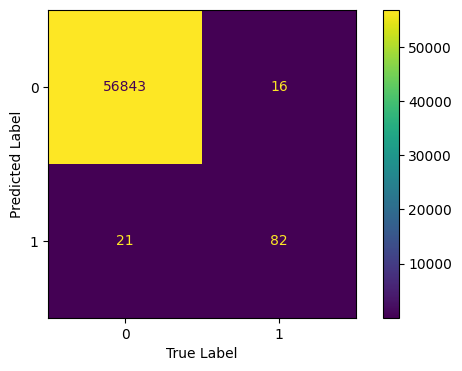



Classification Report:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.80      0.84      0.82        98

    accuracy                           1.00     56962
   macro avg       0.90      0.92      0.91     56962
weighted avg       1.00      1.00      1.00     56962



In [55]:

print('Confusion Matrix\n')
# print(metrics.confusion_matrix(y_test, y_pred))

fig, ax = plt.subplots(1,1,figsize=(7,4))

ConfusionMatrixDisplay(confusion_matrix(nn_preds_thresh, y_test, labels=[0,1]),
                       display_labels=[0,1]).plot(values_format=".0f",ax=ax)

ax.set_xlabel("True Label")
ax.set_ylabel("Predicted Label")
plt.show()

print('\n\nClassification Report:\n')
print(metrics.classification_report(y_test, nn_preds_thresh, digits=2))

In [67]:
# serialize model to JSON
model_json = model.to_json()
with open("models/NN_model_final.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights("models/NN_model_final.h5")
print("Saved model to disk")
 

Saved model to disk


### Comparing All 3 Models

In [94]:
nn_precision, nn_recall, _ = precision_recall_curve(y_test, nn_preds)
nn_f1, nn_auc = f1_score(y_test, nn_preds_thresh), auc(nn_recall, nn_precision)

svm_precision, svm_recall, _ = precision_recall_curve(y_test, y_pred_svm)
svm_auc = auc(svm_recall, svm_precision)

rf_precision, rf_recall, _ = precision_recall_curve(y_test, y_pred_rf)
rf_auc = auc(rf_recall, rf_precision)

print(f'ANN: auc={nn_auc:.3f}; f1={nn_f1:.3f}')
print(f'SVM: auc={svm_auc:.3f}')
print(f'RF:  auc={rf_auc:.3f}')


ANN: auc=0.816; f1=0.816
SVM: auc=0.495
RF:  auc=0.714


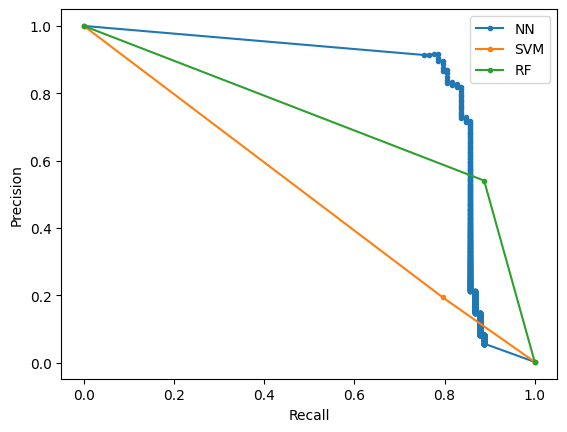

In [95]:
plt.plot(nn_recall, nn_precision, marker='.', label='NN')
plt.plot(svm_recall, svm_precision, marker='.', label='SVM')
plt.plot(rf_recall, rf_precision, marker='.', label='RF')
# axis labels
plt.xlabel('Recall')
plt.ylabel('Precision')
# show the legend
plt.legend()
# show the plot
plt.show()

# Section 2


Below I have provided previous model attempts as evidence of the work involved in reaching the above

In [4]:
# Data processing 
import numpy as np 
import pandas as pd 
from collections import Counter
import joblib
import pickle

# Data Viz
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

# ML packages
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

# Metrics
from sklearn import metrics
from sklearn.metrics import recall_score, precision_score, \
                            average_precision_score, f1_score, \
                            precision_recall_curve
from sklearn.metrics import make_scorer




# Resampling Techniques
from imblearn.over_sampling import SMOTE 
from imblearn.under_sampling import EditedNearestNeighbours
from imblearn.under_sampling import RepeatedEditedNearestNeighbours
from imblearn.under_sampling import RandomUnderSampler


In [40]:
### new packages: 
from sklearn.model_selection import train_test_split

import tensorflow as tf
from tensorflow import keras

import tensorflow_addons as tfa



In [7]:
X_sm, y_sm, X_test, y_test =pickle.load( open( "data/processed_datasets.p", "rb" ) )

In [8]:
# Create validation datasets
X_train, X_val, y_train, y_val = train_test_split(X_sm, y_sm, random_state=42)

# Scale data to prep for NN:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val) 
X_test = scaler.transform(X_test)


In [13]:
print('Training labels shape:', y_train.shape)
print('Validation labels shape:', y_val.shape)
print('Test labels shape:', y_test.shape)

print('Training features shape:', X_train.shape)
print('Validation features shape:', X_val.shape)
print('Test features shape:', X_test.shape)

Training labels shape: (15000,)
Validation labels shape: (5000,)
Test labels shape: (56962,)
Training features shape: (15000, 30)
Validation features shape: (5000, 30)
Test features shape: (56962, 30)


In [23]:
# output_bias = tf.keras.initializers.Constant(np.log([fraud_count / not_fraud_count]))

model = keras.Sequential(
    [
        keras.layers.Dense(
            500, activation="relu", input_shape=(X_train.shape[-1],)
        ),
        keras.layers.Dense(
            500, activation="relu", input_shape=(X_train.shape[-1],)
        ),
        keras.layers.Dropout(0.2),
        keras.layers.Dense(1, activation="sigmoid"),
    ]
)

model.compile(
    optimizer=keras.optimizers.Adam(learning_rate=1e-3),
    loss=keras.losses.BinaryCrossentropy(),
    metrics=[
        keras.metrics.Precision(name="precision"),
        keras.metrics.Recall(name="recall")#,
        # keras.metrics.MeanAveragePrecisionMetric(name='mapm')
    ],
)

checkpoint_cb = keras.callbacks.ModelCheckpoint("models/nn.h5", save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True,
                                                  monitor="val_precision")



model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 500)               15500     
                                                                 
 dense_10 (Dense)            (None, 500)               250500    
                                                                 
 dropout_3 (Dropout)         (None, 500)               0         
                                                                 
 dense_11 (Dense)            (None, 1)                 501       
                                                                 
Total params: 266,501
Trainable params: 266,501
Non-trainable params: 0
_________________________________________________________________


In [26]:
BATCH_SIZE = 32

early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor="val_precision", verbose=1, patience=10, mode="max", restore_best_weights=True
)

history = model.fit(
    X_train,
    y_train,
    batch_size=BATCH_SIZE,
    epochs=100,
    callbacks=[checkpoint_cb, early_stopping],
    validation_data=(X_val, y_val)
)

Epoch 1/100
469/469 [==============================] - 2s 5ms/step - loss: 0.0086 - precision: 0.9979 - recall: 0.9969 - val_loss: 0.0249 - val_precision: 0.9911 - val_recall: 0.9931
Epoch 2/100
469/469 [==============================] - 2s 5ms/step - loss: 0.0077 - precision: 0.9981 - recall: 0.9980 - val_loss: 0.0219 - val_precision: 0.9900 - val_recall: 0.9996
Epoch 3/100
469/469 [==============================] - 2s 4ms/step - loss: 0.0065 - precision: 0.9977 - recall: 0.9983 - val_loss: 0.0296 - val_precision: 0.9912 - val_recall: 0.9964
Epoch 4/100
469/469 [==============================] - 2s 5ms/step - loss: 0.0084 - precision: 0.9975 - recall: 0.9977 - val_loss: 0.0195 - val_precision: 0.9956 - val_recall: 0.9947
Epoch 5/100
469/469 [==============================] - 2s 5ms/step - loss: 0.0109 - precision: 0.9968 - recall: 0.9959 - val_loss: 0.0236 - val_precision: 0.9956 - val_recall: 0.9960
Epoch 6/100
469/469 [==============================] - 2s 5ms/step - loss: 0.0050 - p

In [31]:
model.evaluate(X_test, y_test)

1781/1781 [==============================] - 4s 2ms/step - loss: 0.0405 - precision: 0.2796 - recall: 0.8673


[0.04049735516309738, 0.27960526943206787, 0.8673469424247742]

In [37]:
# output_bias = tf.keras.initializers.Constant(np.log([fraud_count / not_fraud_count]))

model2 = keras.Sequential(
    [
        keras.layers.Dense(
            250, activation="relu", input_shape=(X_train.shape[-1],)
        ),
        keras.layers.Dense(
            500, activation="relu", input_shape=(X_train.shape[-1],)
        ),
        keras.layers.Dense(
            500, activation="relu", input_shape=(X_train.shape[-1],)
        ),
        keras.layers.Dense(
            250, activation="relu", input_shape=(X_train.shape[-1],)
        ),
        keras.layers.Dropout(0.2),
        keras.layers.Dense(1, activation="sigmoid"),
    ]
)

model2.compile(
    optimizer=keras.optimizers.Adam(learning_rate=1e-3),
    loss=keras.losses.BinaryCrossentropy(),
    metrics=[
        keras.metrics.Precision(name="precision"),
        keras.metrics.Recall(name="recall")#,
        # keras.metrics.MeanAveragePrecisionMetric(name='mapm')
    ],
)

checkpoint_cb = keras.callbacks.ModelCheckpoint("models/nn2.h5", save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True,
                                                  monitor="val_precision")



model2.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_29 (Dense)            (None, 250)               7750      
                                                                 
 dense_30 (Dense)            (None, 500)               125500    
                                                                 
 dense_31 (Dense)            (None, 500)               250500    
                                                                 
 dense_32 (Dense)            (None, 250)               125250    
                                                                 
 dropout_7 (Dropout)         (None, 250)               0         
                                                                 
 dense_33 (Dense)            (None, 1)                 251       
                                                                 
Total params: 509,251
Trainable params: 509,251
Non-tr

In [38]:
BATCH_SIZE = 32

early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor="val_precision", verbose=1, patience=10, mode="max", restore_best_weights=True
)

history = model2.fit(
    X_train,
    y_train,
    batch_size=BATCH_SIZE,
    epochs=100,
    callbacks=[checkpoint_cb, early_stopping],
    validation_data=(X_val, y_val)
)

model2.evaluate(X_test, y_test)

Epoch 1/100
469/469 [==============================] - 3s 6ms/step - loss: 0.0975 - precision: 0.9754 - recall: 0.9579 - val_loss: 0.0517 - val_precision: 0.9742 - val_recall: 0.9907
Epoch 2/100
469/469 [==============================] - 3s 5ms/step - loss: 0.0394 - precision: 0.9867 - recall: 0.9859 - val_loss: 0.0290 - val_precision: 0.9836 - val_recall: 0.9960
Epoch 3/100
469/469 [==============================] - 3s 5ms/step - loss: 0.0209 - precision: 0.9935 - recall: 0.9939 - val_loss: 0.0215 - val_precision: 0.9947 - val_recall: 0.9871
Epoch 4/100
469/469 [==============================] - 3s 5ms/step - loss: 0.0208 - precision: 0.9914 - recall: 0.9944 - val_loss: 0.0197 - val_precision: 0.9923 - val_recall: 0.9935
Epoch 5/100
469/469 [==============================] - 3s 5ms/step - loss: 0.0171 - precision: 0.9938 - recall: 0.9957 - val_loss: 0.0178 - val_precision: 0.9916 - val_recall: 0.9984
Epoch 6/100
469/469 [==============================] - 2s 5ms/step - loss: 0.0132 - p

[0.0819220244884491, 0.33464565873146057, 0.8673469424247742]

In [45]:
# output_bias = tf.keras.initializers.Constant(np.log([fraud_count / not_fraud_count]))

model3 = keras.Sequential(
    [
        keras.layers.Dense(
            250, activation="relu", input_shape=(X_train.shape[-1],)
        ),
        keras.layers.Dense(
            250, activation="relu", input_shape=(X_train.shape[-1],)
        ),
        keras.layers.Dense(
            500, activation="relu", input_shape=(X_train.shape[-1],)
        ),
        keras.layers.Dense(
            500, activation="relu", input_shape=(X_train.shape[-1],)
        ),
        keras.layers.Dense(
            250, activation="relu", input_shape=(X_train.shape[-1],)
        ),
        keras.layers.Dense(
            250, activation="relu", input_shape=(X_train.shape[-1],)
        ),
        keras.layers.Dropout(0.2),
        keras.layers.Dense(1, activation="sigmoid"),
    ]
)

model3.compile(
    optimizer=keras.optimizers.Adam(learning_rate=1e-3),
    loss=keras.losses.BinaryCrossentropy(),
    metrics=[
        keras.metrics.Precision(name="precision"),
        keras.metrics.Recall(name="recall"),
        tfa.metrics.F1Score(name="f1_score", num_classes=1)
    ],
)

checkpoint_cb = keras.callbacks.ModelCheckpoint("models/nn3.h5", save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True,
                                                  monitor="val_precision")



model3.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_55 (Dense)            (None, 250)               7750      
                                                                 
 dense_56 (Dense)            (None, 250)               62750     
                                                                 
 dense_57 (Dense)            (None, 500)               125500    
                                                                 
 dense_58 (Dense)            (None, 500)               250500    
                                                                 
 dense_59 (Dense)            (None, 250)               125250    
                                                                 
 dense_60 (Dense)            (None, 250)               62750     
                                                                 
 dropout_11 (Dropout)        (None, 250)             

In [46]:
BATCH_SIZE = 32

early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor="val_precision", verbose=1, patience=10, mode="max", restore_best_weights=True
)

history = model3.fit(
    X_train,
    y_train,
    batch_size=BATCH_SIZE,
    epochs=100,
    callbacks=[checkpoint_cb, early_stopping],
    validation_data=(X_val, y_val)
)

model3.evaluate(X_test, y_test)

Epoch 1/100
469/469 [==============================] - 4s 7ms/step - loss: 0.0977 - precision: 0.9751 - recall: 0.9629 - f1_score: 0.6682 - val_loss: 0.0417 - val_precision: 0.9836 - val_recall: 0.9915 - val_f1_score: 0.6626
Epoch 2/100
469/469 [==============================] - 3s 6ms/step - loss: 0.0410 - precision: 0.9879 - recall: 0.9864 - f1_score: 0.6695 - val_loss: 0.0297 - val_precision: 0.9947 - val_recall: 0.9899 - val_f1_score: 0.6705
Epoch 3/100
469/469 [==============================] - 3s 6ms/step - loss: 0.0261 - precision: 0.9916 - recall: 0.9914 - f1_score: 0.6780 - val_loss: 0.0308 - val_precision: 0.9967 - val_recall: 0.9867 - val_f1_score: 0.6691
Epoch 4/100
469/469 [==============================] - 3s 6ms/step - loss: 0.0229 - precision: 0.9932 - recall: 0.9931 - f1_score: 0.6861 - val_loss: 0.0384 - val_precision: 0.9971 - val_recall: 0.9778 - val_f1_score: 0.6810
Epoch 5/100
469/469 [==============================] - 3s 6ms/step - loss: 0.0264 - precision: 0.995

[0.12513694167137146,
 0.2507374584674835,
 0.8673469424247742,
 array([0.00540239], dtype=float32)]

In [51]:
model2_1 = keras.Sequential(
    [
        keras.layers.Dense(
            250, activation="relu", input_shape=(X_train.shape[-1],)
        ),
        keras.layers.Dense(
            500, activation="relu", input_shape=(X_train.shape[-1],)
        ),
        keras.layers.Dense(
            500, activation="relu", input_shape=(X_train.shape[-1],)
        ),
        keras.layers.Dense(
            250, activation="relu", input_shape=(X_train.shape[-1],)
        ),
        keras.layers.Dropout(0.1),
        keras.layers.Dense(1, activation="sigmoid"),
    ]
)

model2_1.compile(
    optimizer=keras.optimizers.Adam(learning_rate=1e-3),
    loss=keras.losses.BinaryCrossentropy(),
    metrics=[
        keras.metrics.Precision(name="precision"),
        keras.metrics.Recall(name="recall"),
        tfa.metrics.F1Score(name="f1_score", num_classes=1)
    ],
)

checkpoint_cb = keras.callbacks.ModelCheckpoint("models/nn2_1.h5", save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True,
                                                  monitor="val_precision")



model2_1.summary()

Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_77 (Dense)            (None, 250)               7750      
                                                                 
 dense_78 (Dense)            (None, 500)               125500    
                                                                 
 dense_79 (Dense)            (None, 500)               250500    
                                                                 
 dense_80 (Dense)            (None, 250)               125250    
                                                                 
 dropout_15 (Dropout)        (None, 250)               0         
                                                                 
 dense_81 (Dense)            (None, 1)                 251       
                                                                 
Total params: 509,251
Trainable params: 509,251
Non-t

In [52]:
BATCH_SIZE = 32

early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor="val_precision", verbose=1, patience=10, mode="max", restore_best_weights=True
)

history = model2_1.fit(
    X_train,
    y_train,
    batch_size=BATCH_SIZE,
    epochs=100,
    callbacks=[checkpoint_cb, early_stopping],
    validation_data=(X_val, y_val)
)

model2_1.evaluate(X_test, y_test)

Epoch 1/100
469/469 [==============================] - 4s 7ms/step - loss: 0.0921 - precision: 0.9765 - recall: 0.9592 - f1_score: 0.6681 - val_loss: 0.0371 - val_precision: 0.9919 - val_recall: 0.9830 - val_f1_score: 0.6627
Epoch 2/100
469/469 [==============================] - 3s 6ms/step - loss: 0.0347 - precision: 0.9880 - recall: 0.9883 - f1_score: 0.6691 - val_loss: 0.0320 - val_precision: 0.9947 - val_recall: 0.9798 - val_f1_score: 0.6644
Epoch 3/100
469/469 [==============================] - 3s 6ms/step - loss: 0.0215 - precision: 0.9920 - recall: 0.9935 - f1_score: 0.6721 - val_loss: 0.0208 - val_precision: 0.9951 - val_recall: 0.9943 - val_f1_score: 0.6662
Epoch 4/100
469/469 [==============================] - 3s 6ms/step - loss: 0.0214 - precision: 0.9938 - recall: 0.9938 - f1_score: 0.6729 - val_loss: 0.0292 - val_precision: 0.9888 - val_recall: 0.9984 - val_f1_score: 0.6700
Epoch 5/100
469/469 [==============================] - 3s 6ms/step - loss: 0.0182 - precision: 0.994

[0.05085396766662598,
 0.330739289522171,
 0.8673469424247742,
 array([0.00516393], dtype=float32)]

#### Kaggle Model:

In [66]:
model4 = keras.Sequential([
    keras.layers.Dense(input_dim = 30, units = 128, activation = "relu"),
    keras.layers.Dense(units= 64, activation = "relu"),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(units= 32, activation = "relu"),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(units= 32, activation = "relu"),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(units= 16, activation = "relu"),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(units=1, activation = "sigmoid")])


model4.compile(
    optimizer=keras.optimizers.Adam(learning_rate=1e-3),
    loss=keras.losses.BinaryCrossentropy(),
    metrics=[
        keras.metrics.Precision(name="precision"),
        keras.metrics.Recall(name="recall"),
        keras.metrics.Accuracy(name="accuracy"),
        tfa.metrics.F1Score(name="f1_score", num_classes=1)
    ],
)

checkpoint_cb = keras.callbacks.ModelCheckpoint("models/nn4.h5", save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True,
                                                  monitor="val_precision")



model4.summary()

Model: "sequential_20"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_106 (Dense)           (None, 128)               3968      
                                                                 
 dense_107 (Dense)           (None, 64)                8256      
                                                                 
 dropout_32 (Dropout)        (None, 64)                0         
                                                                 
 dense_108 (Dense)           (None, 32)                2080      
                                                                 
 dropout_33 (Dropout)        (None, 32)                0         
                                                                 
 dense_109 (Dense)           (None, 32)                1056      
                                                                 
 dropout_34 (Dropout)        (None, 32)              

In [67]:
BATCH_SIZE = 32

early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor="val_precision", verbose=1, patience=10, mode="max", restore_best_weights=True
)

history4 = model4.fit(
    X_train,
    y_train,
    batch_size=BATCH_SIZE,
    epochs=100,
    callbacks=[checkpoint_cb, early_stopping],
    validation_data=(X_val, y_val)
)

score4 = model4.evaluate(X_test, y_test)

print(f"test loss: {score4[0]}; \ntest precision: {score4[1]}; \ntest recall: {score4[2]}; \ntest accuracy: {score4[3]}; \ntest F1 Score: {score4[4]}")

Epoch 1/100
469/469 [==============================] - 4s 8ms/step - loss: 0.1765 - precision: 0.9704 - recall: 0.8963 - accuracy: 0.0858 - f1_score: 0.6681 - val_loss: 0.0650 - val_precision: 0.9833 - val_recall: 0.9721 - val_accuracy: 0.2016 - val_f1_score: 0.6624
Epoch 2/100
469/469 [==============================] - 3s 7ms/step - loss: 0.0728 - precision: 0.9804 - recall: 0.9763 - accuracy: 0.2364 - f1_score: 0.6685 - val_loss: 0.0488 - val_precision: 0.9862 - val_recall: 0.9834 - val_accuracy: 0.2832 - val_f1_score: 0.6625
Epoch 3/100
469/469 [==============================] - 3s 7ms/step - loss: 0.0472 - precision: 0.9860 - recall: 0.9842 - accuracy: 0.2809 - f1_score: 0.6692 - val_loss: 0.0343 - val_precision: 0.9860 - val_recall: 0.9927 - val_accuracy: 0.2944 - val_f1_score: 0.6641
Epoch 4/100
469/469 [==============================] - 3s 7ms/step - loss: 0.0372 - precision: 0.9877 - recall: 0.9900 - accuracy: 0.2927 - f1_score: 0.6726 - val_loss: 0.0324 - val_precision: 0.9887

1781/1781 [==============================] - 2s 1ms/step
Confusion Matrix



ValueError: Classification metrics can't handle a mix of continuous and binary targets

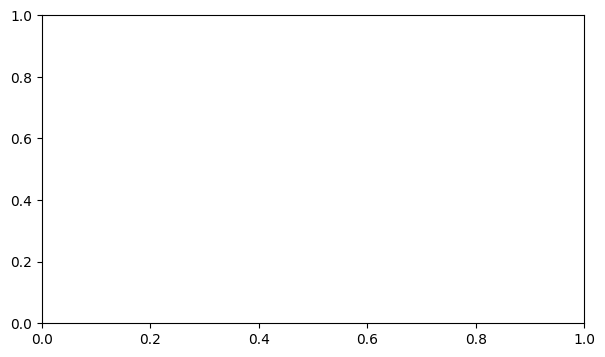

In [68]:
y_pred__nn4 = model4.predict(X_test)

print('Confusion Matrix\n')
# print(metrics.confusion_matrix(y_test, y_pred))

fig, ax = plt.subplots(1,1,figsize=(7,4))

ConfusionMatrixDisplay(confusion_matrix(y_pred__nn4, y_test, labels=[0,1]),
                       display_labels=[0,1]).plot(values_format=".0f",ax=ax)

ax.set_xlabel("True Label")
ax.set_ylabel("Predicted Label")
plt.show()

print('\n\nClassification Report:\n')
print(metrics.classification_report(y_test, y_pred__nn4, digits=2))

In [3]:
def processing_SMOTE(X, y):
     # SMOTE
    sm = SMOTE(random_state=42)

    X_sm, y_sm = sm.fit_resample(X, y)
    
    print(f'''Shape of X before SMOTE: {X.shape} \nShape of X after SMOTE: {X_sm.shape}''')

    print(f'\nBalance of positive and negative classes (%): \n{y_sm.value_counts(normalize=True) * 100}\n')
    
    
    # pd.concat([pd.DataFrame(y_sm),X_sm], axis=1)
    
    return X_sm, y_sm


data = pd.read_csv('data/creditcard.csv')

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(data, data["Class"]):
    strat_train_set = data.loc[train_index]
    strat_test_set = data.loc[test_index]
    
# testing data
X_test = strat_test_set.drop("Class", axis=1) 
y_test = strat_test_set["Class"].copy()

X_train = strat_train_set.drop("Class", axis=1) # drop labels for training set
y_train = strat_train_set["Class"].copy()


X_train, y_train = processing_SMOTE(X_train, y_train)

Shape of X before SMOTE: (227845, 30) 
Shape of X after SMOTE: (454902, 30)

Balance of positive and negative classes (%): 
0    50.0
1    50.0
Name: Class, dtype: float64



In [4]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Scale data to prep for NN:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val) 
X_test = scaler.transform(X_test)


In [5]:
print(f' X_train shape: {X_train.shape}')
print(f' X_val shape: {X_val.shape}')
print(f' y_train shape: {y_train.shape}')
print(f' y_val shape: {y_val.shape}')

 X_train shape: (363921, 30)
 X_val shape: (90981, 30)
 y_train shape: (363921,)
 y_val shape: (90981,)


In [7]:
model4 = keras.Sequential([
    keras.layers.Dense(input_dim = 30, units = 128, activation = "relu"),
    keras.layers.Dense(units= 64, activation = "relu"),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(units= 32, activation = "relu"),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(units= 32, activation = "relu"),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(units= 16, activation = "relu"),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(units=1, activation = "sigmoid")])


model4.compile(
    optimizer=keras.optimizers.Adam(learning_rate=1e-3),
    loss=keras.losses.BinaryCrossentropy(),
    metrics=[
        keras.metrics.Precision(name="precision"),
        keras.metrics.Recall(name="recall"),
        keras.metrics.Accuracy(name="accuracy"),
        tfa.metrics.F1Score(name="f1_score", num_classes=1)
    ],
)

checkpoint_cb = keras.callbacks.ModelCheckpoint("models/nn4.h5", save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True,
                                                  monitor="val_precision")



model4.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               3968      
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_2 (Dense)             (None, 32)                2080      
                                                                 
 dropout_1 (Dropout)         (None, 32)                0         
                                                                 
 dense_3 (Dense)             (None, 32)                1056      
                                                                 
 dropout_2 (Dropout)         (None, 32)                0

In [8]:
BATCH_SIZE = 32

early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor="val_precision", verbose=1, patience=10, mode="max", restore_best_weights=True
)

history4 = model4.fit(
    X_train,
    y_train,
    batch_size=BATCH_SIZE,
    epochs=100,
    callbacks=[checkpoint_cb, early_stopping],
    validation_data=(X_val, y_val)
)

score4 = model4.evaluate(X_test, y_test)

print(f"test loss: {score4[0]}; \ntest precision: {score4[1]}; \ntest recall: {score4[2]}; \ntest accuracy: {score4[3]}; \ntest F1 Score: {score4[4]}")

Epoch 1/100
11373/11373 [==============================] - 70s 6ms/step - loss: 0.0266 - precision: 0.9926 - recall: 0.9913 - accuracy: 0.2234 - f1_score: 0.7294 - val_loss: 0.0069 - val_precision: 0.9975 - val_recall: 0.9985 - val_accuracy: 0.1974 - val_f1_score: 0.7981
Epoch 2/100
11373/11373 [==============================] - 66s 6ms/step - loss: 0.0088 - precision: 0.9974 - recall: 0.9984 - accuracy: 0.2724 - f1_score: 0.8230 - val_loss: 0.0050 - val_precision: 0.9988 - val_recall: 0.9981 - val_accuracy: 0.3243 - val_f1_score: 0.8433
Epoch 3/100
11373/11373 [==============================] - 66s 6ms/step - loss: 0.0064 - precision: 0.9980 - recall: 0.9990 - accuracy: 0.3331 - f1_score: 0.8554 - val_loss: 0.0097 - val_precision: 0.9958 - val_recall: 0.9991 - val_accuracy: 0.3784 - val_f1_score: 0.8636
Epoch 4/100
11373/11373 [==============================] - 66s 6ms/step - loss: 0.0059 - precision: 0.9984 - recall: 0.9991 - accuracy: 0.3340 - f1_score: 0.8624 - val_loss: 0.0015 - v

In [9]:
not_fraud_count, fraud_count = np.bincount(data["Class"])

total_count = not_fraud_count + fraud_count
print(
    (
        f"Data:\n"
        f"    Total: {total_count}\n"
        f"    Fraud: {fraud_count} ({100 * fraud_count / total_count:.2f}% of total)\n"
    )
)

Data:
    Total: 284807
    Fraud: 492 (0.17% of total)



In [19]:
weight_for_not_fraud = (1.0 / not_fraud_count) * total_count / 2.0
weight_for_fraud = (1.0 / fraud_count) * total_count / 2.0

class_weight = {0: weight_for_not_fraud, 1: weight_for_fraud}

class_weight

{0: 0.5008652375006595, 1: 289.43800813008136}

In [9]:
history4.history

{'loss': [0.026620861142873764,
  0.008754107169806957,
  0.006446955259889364,
  0.005859570112079382,
  0.004800871945917606,
  0.004864133894443512,
  0.0037277797237038612,
  0.0033326672855764627,
  0.003451492404565215,
  0.0035877942573279142,
  0.003494138130918145,
  0.0029460014775395393,
  0.003149347612634301,
  0.0028081529308110476,
  0.0025712514761835337,
  0.0026138669345527887,
  0.0026860206853598356,
  0.0026207773480564356],
 'precision': [0.9925680756568909,
  0.9973856210708618,
  0.9980170130729675,
  0.9983847141265869,
  0.9985551834106445,
  0.9987307786941528,
  0.9988461136817932,
  0.9989011287689209,
  0.9989669322967529,
  0.9990549087524414,
  0.9990273714065552,
  0.9990987777709961,
  0.9990714192390442,
  0.999153733253479,
  0.9992910623550415,
  0.9991921782493591,
  0.9993075132369995,
  0.9992141127586365],
 'recall': [0.9913347363471985,
  0.9984495043754578,
  0.9989718198776245,
  0.9991147518157959,
  0.9994061589241028,
  0.9994391798973083,

In [10]:
print("Evaluate")
result = model4.evaluate(X_test, y_test)
dict(zip(model4.metrics_names, result))

Evaluate
1781/1781 [==============================] - 6s 4ms/step - loss: 0.0236 - precision: 0.7434 - recall: 0.8571 - accuracy: 0.7148 - f1_score: 0.3295


{'loss': 0.02360728196799755,
 'precision': 0.7433628439903259,
 'recall': 0.8571428656578064,
 'accuracy': 0.7147572040557861,
 'f1_score': array([0.32954544], dtype=float32)}

In [13]:
test_preds=model4.predict(X_test)

1781/1781 [==============================] - 2s 1ms/step


In [23]:
test_preds_bool = test_preds >0
  

Confusion Matrix



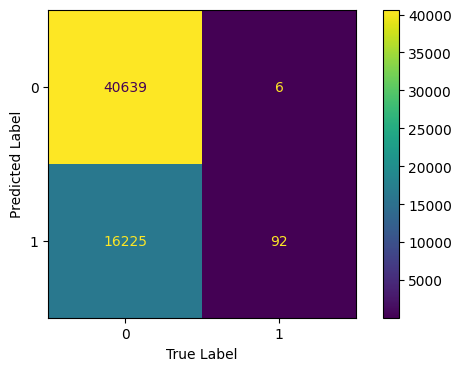



Classification Report:

              precision    recall  f1-score   support

           0       1.00      0.71      0.83     56864
           1       0.01      0.94      0.01        98

    accuracy                           0.72     56962
   macro avg       0.50      0.83      0.42     56962
weighted avg       1.00      0.72      0.83     56962



In [26]:
# y_pred_rf = rnd_forest_RS.predict(X_test)

print('Confusion Matrix\n')
# print(metrics.confusion_matrix(y_test, y_pred))

fig, ax = plt.subplots(1,1,figsize=(7,4))

ConfusionMatrixDisplay(confusion_matrix(test_preds_bool, y_test, labels=[0,1]),
                       display_labels=[0,1]).plot(values_format=".0f",ax=ax)

ax.set_xlabel("True Label")
ax.set_ylabel("Predicted Label")
plt.show()

print('\n\nClassification Report:\n')
print(metrics.classification_report(y_test, test_preds_bool, digits=2))

In [27]:
tf.math.confusion_matrix(
    labels=y_test, 
    predictions= test_preds,
    num_classes=2
)

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[56859,     5],
       [   23,    75]])>

In [28]:
dict(zip(model4.metrics_names, result))

{'loss': 0.02360728196799755,
 'precision': 0.7433628439903259,
 'recall': 0.8571428656578064,
 'accuracy': 0.7147572040557861,
 'f1_score': array([0.32954544], dtype=float32)}

In [29]:
75/(75+23)

0.7653061224489796

In [30]:
75/80

0.9375

In [34]:
# serialize model to JSON
model_json = model4.to_json()
with open("models/NN_model.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model4.save_weights("models/NN_model.h5")
print("Saved model to disk")
 

 

Saved model to disk


In [12]:
# later...
 
# load json and create model
json_file = open('models/NN_model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = keras.models.model_from_json(loaded_model_json)
# load weights into new model
loaded_model.load_weights("models/NN_model.h5")
print("Loaded model from disk")

2022-11-29 10:42:12.336333: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-11-29 10:42:12.336370: W tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:265] failed call to cuInit: UNKNOWN ERROR (303)
2022-11-29 10:42:12.336392: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (9a14c434c92b4547a5373f8434b0351f-740363089): /proc/driver/nvidia/version does not exist
2022-11-29 10:42:12.336694: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Loaded model from disk


In [13]:
loaded_model.compile(
    optimizer=keras.optimizers.Adam(learning_rate=1e-3),
    loss=keras.losses.BinaryCrossentropy(),
    metrics=[
        keras.metrics.Precision(name="precision"),
        keras.metrics.Recall(name="recall"),
        keras.metrics.Accuracy(name="accuracy"),
        tfa.metrics.F1Score(name="f1_score", num_classes=1)
    ],
)

In [18]:
loaded_model.evaluate(X_test, y_test)

Instructions for updating:
Lambda fuctions will be no more assumed to be used in the statement where they are used, or at least in the same block. https://github.com/tensorflow/tensorflow/issues/56089
1781/1781 [==============================] - 10s 4ms/step - loss: 0.0236 - precision: 0.7434 - recall: 0.8571 - accuracy: 0.7147 - f1_score: 0.3295


[0.02360728196799755,
 0.7433628439903259,
 0.8571428656578064,
 0.7147220969200134,
 array([0.32954544], dtype=float32)]

https://machinelearningmastery.com/save-load-keras-deep-learning-models/

#### FURTHER WORK ON PREDICTIONS

In [20]:
nn_preds = loaded_model.predict(X_test, verbose=2)

1781/1781 - 6s - 6s/epoch - 4ms/step


In [21]:
nn_preds_thresh = nn_preds > 0.5

Confusion Matrix



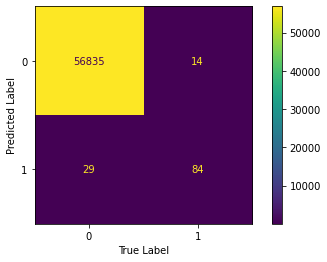



Classification Report:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.74      0.86      0.80        98

    accuracy                           1.00     56962
   macro avg       0.87      0.93      0.90     56962
weighted avg       1.00      1.00      1.00     56962



In [23]:

print('Confusion Matrix\n')
# print(metrics.confusion_matrix(y_test, y_pred))

fig, ax = plt.subplots(1,1,figsize=(7,4))

ConfusionMatrixDisplay(confusion_matrix(nn_preds_thresh, y_test, labels=[0,1]),
                       display_labels=[0,1]).plot(values_format=".0f",ax=ax)

ax.set_xlabel("True Label")
ax.set_ylabel("Predicted Label")
plt.show()

print('\n\nClassification Report:\n')
print(metrics.classification_report(y_test, nn_preds_thresh, digits=2))

In [6]:
# precision-recall curve and f1
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score
from sklearn.metrics import auc

lr_probs = model.predict_proba(testX)
# # keep probabilities for the positive outcome only
# lr_probs = lr_probs[:, 1]
# # predict class values
# yhat = model.predict(testX)
# lr_precision, lr_recall, _ = precision_recall_curve(testy, lr_probs)
# lr_f1, lr_auc = f1_score(testy, yhat), auc(lr_recall, lr_precision)


In [39]:
nn_precision, nn_recall, nn_thresholds = precision_recall_curve(y_test, nn_preds)

In [38]:
nn_f1, nn_auc = f1_score(y_test, nn_preds_thresh), auc(nn_recall, nn_precision)
print(f'Neural Network: f1={nn_f1:.3f} auc={nn_auc:.3f}')

Neural Network: f1=0.796 auc=0.830


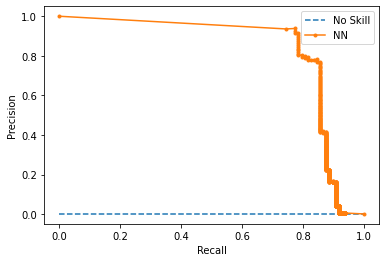

In [30]:
# plot the precision-recall curves
no_skill = len(y_test[y_test==1]) / len(y_test)
plt.plot([0, 1], [no_skill, no_skill], linestyle='--', label='No Skill')
plt.plot(nn_recall, nn_precision, marker='.', label='NN')
# axis labels
plt.xlabel('Recall')
plt.ylabel('Precision')
# show the legend
plt.legend()
# show the plot
plt.show()

In [8]:
svm_rsg_result = joblib.load('models/svm_rsg_model.sav')
rnd_forest_RS = joblib.load('models/rnd_forest_RS.sav')

In [10]:
y_pred_svm = svm_rsg_result.predict(X_test)
y_pred_rf = rnd_forest_RS.predict(X_test)


C:\Users\hugha\anaconda3\envs\tf_gpu\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\hugha\anaconda3\envs\tf_gpu\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [59]:
svm_precision, svm_recall, _ = precision_recall_curve(y_test, y_pred_svm)
# svm_f1 = f1_score(y_test, nn_preds_thresh)
svm_auc = auc(svm_recall, svm_precision)
print(f'SVM: auc={svm_auc:.3f}')

# rf_preds_thresh = rnd_forest_RS.predict_proba(X_test)
rf_precision, rf_recall, _ = precision_recall_curve(y_test, y_pred_rf)
# rf_f1 = f1_score(y_test, y_pred_rf)
rf_auc = auc(rf_recall, rf_precision)
print(f'SVM: auc={rf_auc:.3f}')

SVM: auc=0.042
SVM: auc=0.581


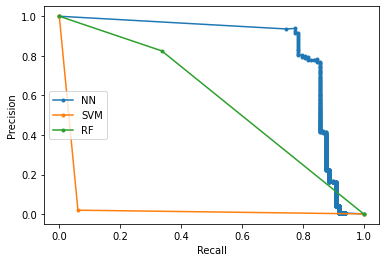

In [60]:
plt.plot(nn_recall, nn_precision, marker='.', label='NN')
plt.plot(svm_recall, svm_precision, marker='.', label='SVM')
plt.plot(rf_recall, rf_precision, marker='.', label='RF')
# axis labels
plt.xlabel('Recall')
plt.ylabel('Precision')
# show the legend
plt.legend()
# show the plot
plt.show()

In [7]:
len(y_test[y_test==1])

98

### Attempting a Grid Search NN


In [4]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import RandomizedSearchCV
import time
import pickle

In [5]:
X_train,y_train, X_test, y_test = pickle.load( open( "data/processed_datasets.p", "rb" ) )

In [6]:
sknn_clas = MLPClassifier()

In [7]:
nn_params = {
    'hidden_layer_sizes': [4,8, 15,20],
    'solver': ['sgd', 'adam'],
    'learning_rate' : ['constant', 'invscaling', 'adaptive'],
    'early_stopping': [True],
    'validation_fraction': [0.2]
}

In [28]:
nn_rsg = RandomizedSearchCV(estimator=sknn_clas, param_distributions=nn_params,
                            n_iter=100, cv=5, verbose=2, 
                            n_jobs=-1, 
                           scoring=['precision', 'recall', 'accuracy', 'f1'], 
                           refit='recall')

%time  nn_rsg.fit(X_train, y_train)

C:\Users\hugha\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:292: UserWarning: The total space of parameters 24 is smaller than n_iter=100. Running 24 iterations. For exhaustive searches, use GridSearchCV.
  )


Fitting 5 folds for each of 24 candidates, totalling 120 fits
Wall time: 11min 15s


RandomizedSearchCV(cv=5, estimator=MLPClassifier(), n_iter=100, n_jobs=-1,
                   param_distributions={'early_stopping': [True],
                                        'hidden_layer_sizes': [4, 8, 15, 20],
                                        'learning_rate': ['constant',
                                                          'invscaling',
                                                          'adaptive'],
                                        'solver': ['sgd', 'adam'],
                                        'validation_fraction': [0.2]},
                   refit='recall',
                   scoring=['precision', 'recall', 'accuracy', 'f1'],
                   verbose=2)

In [8]:
nn_rsg1 = RandomizedSearchCV(estimator=sknn_clas, param_distributions=nn_params,
                            n_iter=100, cv=50, verbose=2, 
                            n_jobs=-1, 
                           scoring=['precision', 'recall', 'accuracy', 'f1'], 
                           refit='recall')

%time  nn_rsg1.fit(X_train, y_train)

C:\Users\hugha\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:306: UserWarning: The total space of parameters 24 is smaller than n_iter=100. Running 24 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Fitting 50 folds for each of 24 candidates, totalling 1200 fits
Wall time: 1h 57min 56s


RandomizedSearchCV(cv=50, estimator=MLPClassifier(), n_iter=100, n_jobs=-1,
                   param_distributions={'early_stopping': [True],
                                        'hidden_layer_sizes': [4, 8, 15, 20],
                                        'learning_rate': ['constant',
                                                          'invscaling',
                                                          'adaptive'],
                                        'solver': ['sgd', 'adam'],
                                        'validation_fraction': [0.2]},
                   refit='recall',
                   scoring=['precision', 'recall', 'accuracy', 'f1'],
                   verbose=2)

In [9]:
nn_rsg1.best_params_

{'validation_fraction': 0.2,
 'solver': 'adam',
 'learning_rate': 'constant',
 'hidden_layer_sizes': 20,
 'early_stopping': True}

In [11]:
nn_rsg1_preds = nn_rsg1.predict(X_test)

In [12]:
nn_rsg1_preds

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

Confusion Matrix



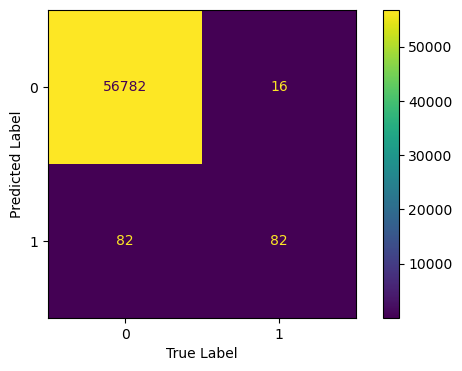



Classification Report:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.50      0.84      0.63        98

    accuracy                           1.00     56962
   macro avg       0.75      0.92      0.81     56962
weighted avg       1.00      1.00      1.00     56962



In [15]:

print('Confusion Matrix\n')
# print(metrics.confusion_matrix(y_test, y_pred))

fig, ax = plt.subplots(1,1,figsize=(7,4))

ConfusionMatrixDisplay(confusion_matrix(nn_rsg1_preds, y_test, labels=[0,1]),
                       display_labels=[0,1]).plot(values_format=".0f",ax=ax)

ax.set_xlabel("True Label")
ax.set_ylabel("Predicted Label")
plt.show()

print('\n\nClassification Report:\n')
print(metrics.classification_report(y_test, nn_rsg1_preds, digits=2))

## Tweaking the TF model

In [47]:
model5 = keras.Sequential([
    keras.layers.Dense(input_dim = 30, units = 128, activation = "relu"),
    keras.layers.Dense(units= 64, activation = "relu"),
    keras.layers.Dropout(0.1),
    keras.layers.Dense(units= 32, activation = "relu"),
    keras.layers.Dropout(0.1),
    keras.layers.Dense(units= 32, activation = "relu"),
    keras.layers.Dropout(0.1),
    keras.layers.Dense(units= 16, activation = "relu"),
    # keras.layers.Dropout(0.1),
    keras.layers.Dense(units=1, activation = "sigmoid")])


model5.compile(
    optimizer=keras.optimizers.Adam(learning_rate=1e-3),
    loss=keras.losses.BinaryCrossentropy(),
    metrics=[
        keras.metrics.Precision(name="precision"),
        keras.metrics.Recall(name="recall"),
        keras.metrics.Accuracy(name="accuracy"),
        tfa.metrics.F1Score(name="f1_score", num_classes=1)
    ],
)

checkpoint_cb = keras.callbacks.ModelCheckpoint("models/nn5.h5", save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True,
                                                  monitor="val_precision")



model5.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_34 (Dense)            (None, 128)               3968      
                                                                 
 dense_35 (Dense)            (None, 64)                8256      
                                                                 
 dropout_24 (Dropout)        (None, 64)                0         
                                                                 
 dense_36 (Dense)            (None, 32)                2080      
                                                                 
 dropout_25 (Dropout)        (None, 32)                0         
                                                                 
 dense_37 (Dense)            (None, 32)                1056      
                                                                 
 dropout_26 (Dropout)        (None, 32)               

In [48]:
BATCH_SIZE = 32

early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor="val_precision", verbose=1, patience=10, mode="max", restore_best_weights=True
)

history5 = model5.fit(
    X_train,
    y_train,
    batch_size=BATCH_SIZE,
    epochs=100,
    callbacks=[checkpoint_cb, early_stopping],
    validation_data=(X_val, y_val)
)

score5 = model5.evaluate(X_test, y_test)



Epoch 1/100
11373/11373 [==============================] - 20s 2ms/step - loss: 0.0219 - precision: 0.9932 - recall: 0.9930 - accuracy: 0.1348 - f1_score: 0.6937 - val_loss: 0.0046 - val_precision: 0.9986 - val_recall: 0.9991 - val_accuracy: 0.0736 - val_f1_score: 0.7147
Epoch 2/100
11373/11373 [==============================] - 18s 2ms/step - loss: 0.0074 - precision: 0.9975 - recall: 0.9984 - accuracy: 0.1971 - f1_score: 0.7611 - val_loss: 0.0315 - val_precision: 0.9995 - val_recall: 0.9817 - val_accuracy: 0.1420 - val_f1_score: 0.8994
Epoch 3/100
11373/11373 [==============================] - 18s 2ms/step - loss: 0.0056 - precision: 0.9983 - recall: 0.9989 - accuracy: 0.2353 - f1_score: 0.7896 - val_loss: 0.0026 - val_precision: 0.9991 - val_recall: 0.9994 - val_accuracy: 0.2775 - val_f1_score: 0.8284
Epoch 4/100
11373/11373 [==============================] - 19s 2ms/step - loss: 0.0041 - precision: 0.9988 - recall: 0.9992 - accuracy: 0.2818 - f1_score: 0.8121 - val_loss: 0.0033 - v

In [49]:
print(f"test loss: {score5[0]}; \ntest precision: {score5[1]}; \ntest recall: {score5[2]}; \ntest accuracy: {score5[3]}; \ntest F1 Score: {score5[4]}")

test loss: 0.03552291914820671; 
test precision: 0.8155339956283569; 
test recall: 0.8571428656578064; 
test accuracy: 0.8640848398208618; 
test F1 Score: [0.36673772]


In [50]:
nn_preds = model5.predict(X_test, verbose=2)
nn_preds_thresh = nn_preds > 0.5

1781/1781 - 1s - 1s/epoch - 630us/step


Confusion Matrix



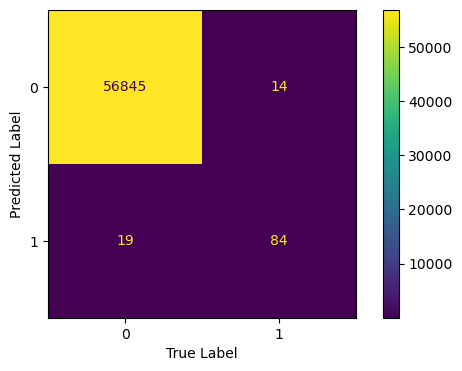



Classification Report:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.82      0.86      0.84        98

    accuracy                           1.00     56962
   macro avg       0.91      0.93      0.92     56962
weighted avg       1.00      1.00      1.00     56962



In [51]:

print('Confusion Matrix\n')
# print(metrics.confusion_matrix(y_test, y_pred))

fig, ax = plt.subplots(1,1,figsize=(7,4))

ConfusionMatrixDisplay(confusion_matrix(nn_preds_thresh, y_test, labels=[0,1]),
                       display_labels=[0,1]).plot(values_format=".0f",ax=ax)

ax.set_xlabel("True Label")
ax.set_ylabel("Predicted Label")
plt.show()

print('\n\nClassification Report:\n')
print(metrics.classification_report(y_test, nn_preds_thresh, digits=2))

#### Model 6

In [54]:
model6 = keras.Sequential([
    keras.layers.Dense(input_dim = 30, units = 128, activation = "relu"),
    keras.layers.Dense(units= 64, activation = "relu"),
    keras.layers.Dropout(0.1),
    keras.layers.Dense(units= 32, activation = "relu"),
    keras.layers.Dropout(0.1),
    keras.layers.Dense(units= 32, activation = "relu"),
    # keras.layers.Dropout(0.1),
    keras.layers.Dense(units= 16, activation = "relu"),
    # keras.layers.Dropout(0.1),
    keras.layers.Dense(units=1, activation = "sigmoid")])


model6.compile(
    optimizer=keras.optimizers.Adam(learning_rate=1e-3),
    loss=keras.losses.BinaryCrossentropy(),
    metrics=[
        keras.metrics.Precision(name="precision"),
        keras.metrics.Recall(name="recall"),
        keras.metrics.Accuracy(name="accuracy"),
        tfa.metrics.F1Score(name="f1_score", num_classes=1)
    ],
)

checkpoint_cb = keras.callbacks.ModelCheckpoint("models/nn6.h5", save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True,
                                                  monitor="val_precision")



model6.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_46 (Dense)            (None, 128)               3968      
                                                                 
 dense_47 (Dense)            (None, 64)                8256      
                                                                 
 dropout_29 (Dropout)        (None, 64)                0         
                                                                 
 dense_48 (Dense)            (None, 32)                2080      
                                                                 
 dropout_30 (Dropout)        (None, 32)                0         
                                                                 
 dense_49 (Dense)            (None, 32)                1056      
                                                                 
 dense_50 (Dense)            (None, 16)               

In [55]:
BATCH_SIZE = 32

early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor="val_precision", verbose=1, patience=10, mode="max", restore_best_weights=True
)

history6 = model6.fit(
    X_train,
    y_train,
    batch_size=BATCH_SIZE,
    epochs=100,
    callbacks=[checkpoint_cb, early_stopping],
    validation_data=(X_val, y_val)
)

score6 = model6.evaluate(X_test, y_test)



Epoch 1/100
11373/11373 [==============================] - 18s 1ms/step - loss: 0.0218 - precision: 0.9936 - recall: 0.9924 - accuracy: 0.1400 - f1_score: 0.6965 - val_loss: 0.0053 - val_precision: 0.9973 - val_recall: 1.0000 - val_accuracy: 0.2042 - val_f1_score: 0.7360
Epoch 2/100
11373/11373 [==============================] - 18s 2ms/step - loss: 0.0066 - precision: 0.9978 - recall: 0.9985 - accuracy: 0.1783 - f1_score: 0.7726 - val_loss: 0.0078 - val_precision: 0.9991 - val_recall: 0.9962 - val_accuracy: 0.3323 - val_f1_score: 0.8210
Epoch 3/100
11373/11373 [==============================] - 17s 2ms/step - loss: 0.0054 - precision: 0.9984 - recall: 0.9989 - accuracy: 0.2249 - f1_score: 0.8050 - val_loss: 0.0034 - val_precision: 0.9982 - val_recall: 1.0000 - val_accuracy: 0.1491 - val_f1_score: 0.7948
Epoch 4/100
11373/11373 [==============================] - 17s 1ms/step - loss: 0.0041 - precision: 0.9988 - recall: 0.9992 - accuracy: 0.2634 - f1_score: 0.8368 - val_loss: 0.0026 - v

In [56]:
print(f"test loss: {score5[0]}; \ntest precision: {score5[1]}; \ntest recall: {score5[2]}; \ntest accuracy: {score5[3]}; \ntest F1 Score: {score5[4]}")

test loss: 0.03552291914820671; 
test precision: 0.8155339956283569; 
test recall: 0.8571428656578064; 
test accuracy: 0.8640848398208618; 
test F1 Score: [0.36673772]


In [57]:
nn_preds = model6.predict(X_test, verbose=2)
nn_preds_thresh = nn_preds > 0.5

1781/1781 - 1s - 1s/epoch - 632us/step


Confusion Matrix



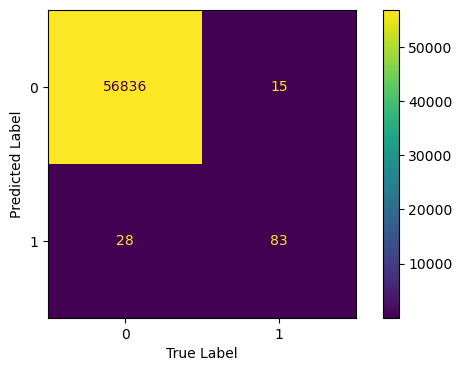



Classification Report:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.75      0.85      0.79        98

    accuracy                           1.00     56962
   macro avg       0.87      0.92      0.90     56962
weighted avg       1.00      1.00      1.00     56962



In [58]:

print('Confusion Matrix\n')
# print(metrics.confusion_matrix(y_test, y_pred))

fig, ax = plt.subplots(1,1,figsize=(7,4))

ConfusionMatrixDisplay(confusion_matrix(nn_preds_thresh, y_test, labels=[0,1]),
                       display_labels=[0,1]).plot(values_format=".0f",ax=ax)

ax.set_xlabel("True Label")
ax.set_ylabel("Predicted Label")
plt.show()

print('\n\nClassification Report:\n')
print(metrics.classification_report(y_test, nn_preds_thresh, digits=2))